In [18]:
import os
import matplotlib as mpl
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime
mpl.rcParams['figure.figsize']= (16,9)
pd.set_option('display.max_rows', 500)

In [19]:
df_analyse= pd.read_csv(r"../data/processed/COVID_small_snyc_timeline_table.csv",sep=';')


In [20]:
df_analyse.sort_values("date", ascending=True).head()

,doubling every two days,doubling every 4 days,doubling every 10 days,Italy,India,US,date
0,100.000000,100.000000,100.000000,155.0,102.0,107.0,0
1,141.421356,118.920712,107.177346,229.0,113.0,184.0,1
2,200.000000,141.421356,114.869835,322.0,119.0,237.0,2
3,282.842712,168.179283,123.114441,453.0,142.0,403.0,3
4,400.000000,200.000000,131.950791,655.0,156.0,519.0,4


In [21]:
def quick_plot(x_in, df_input, y_scale= "log", slider = False):

        fig = go.Figure()

        for each in df_input.columns:
            fig.add_trace(go.Scatter(
                            x=x_in,
                            y=df_input[each],
                            name=each,
                            opacity=0.8))

        fig.update_layout(autosize=True,
            width=1024,
            height=768,
            font=dict(
                family="PT Sans, monospace",
                size=18,
                color="#7f7f7f"
                )
            )
        fig.update_yaxes(type=y_scale),
        fig.update_xaxes(tickangle=-45,
                     nticks=20,
                     tickfont=dict(size=14,color="#7f7f7f")
                    )
        if slider==True:
            fig.update_layout(xaxis_rangeslider_visible=True)
        fig.show()

In [22]:
quick_plot(df_analyse.date,
           df_analyse.iloc[:,3:-1],
           y_scale='log',
           slider=True)

In [23]:
df_poly_check = df_analyse.iloc[0:27,3:-1].reset_index()
df_poly_check

,index,Italy,India,US
0,0,155.0,102.0,107.0
1,1,229.0,113.0,184.0
2,2,322.0,119.0,237.0
3,3,453.0,142.0,403.0
4,4,655.0,156.0,519.0
5,5,888.0,194.0,594.0
6,6,1128.0,244.0,782.0
7,7,1694.0,330.0,1147.0
8,8,2036.0,396.0,1586.0
9,9,2502.0,499.0,2219.0


In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


def Polynomial_Regression(degree =2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

In [25]:
y= df_poly_check[["Italy","India","US"]].unstack().sort_index(axis=0 ,level=1)

In [26]:
y.head()

Italy  0    155.0
India  0    102.0
US     0    107.0
Italy  1    229.0
India  1    113.0
dtype: float64

In [30]:
test_points =28
y_train =y[0:-test_points-1]
y_test= y[-test_points:]

In [31]:
X_train = np.arange(len(y_train)).reshape(-1,1)/4.0
X_test= np.arange(len(y_train),len(y_train)+test_points).reshape(-1,1)/4.0

In [28]:
%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn
seaborn.set(rc={'figure.figsize': (16,8)})

In [32]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true- y_pred)/y_true))*100

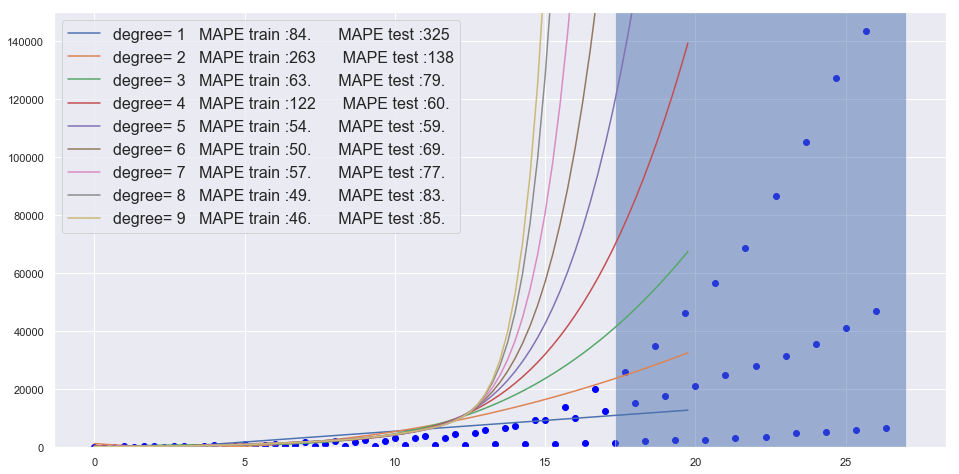

In [37]:
fig , ax1 = plt.subplots(1,1)
ax1.scatter(np.arange(len(y))/3,y, color= "blue")
ax1.axvspan ((len(y)-test_points-1)/3, len(y)/3, facecolor ="b", alpha =0.5)
for degree in np.arange(1,10,1):
    y_hat_insample= Polynomial_Regression(degree).fit(X_train, y_train).predict(X_train)
    y_hat_test= Polynomial_Regression(degree).fit(X_train, y_train).predict(X_test)

    X_plot = np.concatenate((X_train,X_test), axis= None)
    y_plot =  np.concatenate((y_hat_insample,y_hat_test), axis= None)

    ax1.plot(X_plot, y_plot, label = "degree= {0}".format(degree)+ "   MAPE train :"+str(mean_absolute_percentage_error(y_hat_insample,y_train))[0:3]+ "      MAPE test :"+str(mean_absolute_percentage_error(y_hat_test,y_test))[0:3])

ax1.set_ylim(-100,150000)
ax1.set_yscale("linear")
ax1.legend(loc ="best", prop ={"size": 16})
